In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

# Data extraction for differrent Cryptocurruncies

In [2]:
file_content = {}
coin = ['bitcoin','ripple', 'ethereum', 'tether', 'stellar', 'cardano', 'monero',  'dash', 'ontology', 'tezos']
for i in coin:
        url = "https://api.coingecko.com/api/v3/coins/{}/market_chart?vs_currency=usd&days=20".format(i)
        result = requests.get(url)

        file_content[i] = result.json()

In [3]:
data = []
for j in coin:
    test_df = pd.DataFrame(data=file_content[j], columns = file_content[j].keys())
    test_df = pd.DataFrame(test_df['prices'].values.tolist(), columns=['date','price'])
    test_df['coin'] = j
    test_df['time'] = pd.to_datetime(test_df['date'], unit='ms').dt.round('1h')
    test_df.set_index('date',inplace=True)
    data.append(test_df)
    
final_data = pd.concat(data)

final_data.sort_values(by='time',inplace=True)
final_data.head()


,price,coin,time
date,,,
1546866079747,3995.861908,bitcoin,2019-01-07 13:00:00
1546866082101,0.047981,cardano,2019-01-07 13:00:00
1546866080748,0.121520,stellar,2019-01-07 13:00:00
1546866077911,82.399094,dash,2019-01-07 13:00:00
1546866085539,1.008712,tether,2019-01-07 13:00:00


In [4]:
final_data.sort_values(by = ['time', 'coin'], inplace = True)
df2 =final_data.groupby(['time', 'coin'])['price'].first()
df3 =df2.unstack()
df4 = df3.resample('1h').first()
df4.head()

coin,bitcoin,cardano,dash,ethereum,monero,ontology,ripple,stellar,tether,tezos
time,,,,,,,,,,
2019-01-07 13:00:00,3995.861908,0.047981,82.399094,151.843935,52.267946,0.622867,0.364550,0.121520,1.008712,0.476914
2019-01-07 14:00:00,4000.407988,0.048206,82.087532,151.596700,52.266071,0.627302,0.364336,0.121189,1.006695,0.475710
2019-01-07 15:00:00,4003.322023,0.048622,82.727459,152.230477,52.125175,0.629685,0.366427,0.121609,1.006785,0.473581
2019-01-07 16:00:00,3987.014431,0.047721,82.323949,151.234888,52.170070,0.621604,0.364126,0.122409,1.006291,0.474527
2019-01-07 17:00:00,4001.721541,0.048423,82.521310,151.753940,52.533998,0.628358,0.364647,0.122986,1.006459,0.474519


# Bitcoin price trends

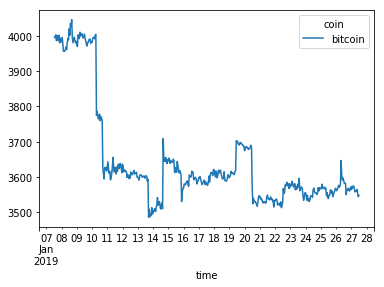

In [5]:
df5 =  df4[['bitcoin']]
df5.plot()

# Compute the correlation between bitcoin and ethereum

Correlation of Bitcoin and Ethereum prices:  0.8561146824896186


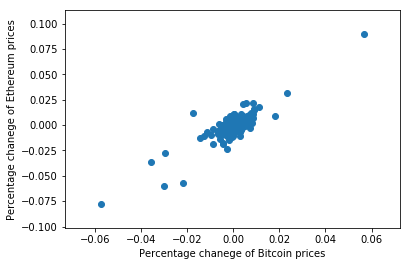

In [6]:
df6 = df4['bitcoin'].pct_change()
df7 = df4['ethereum'].pct_change()
plt.scatter(df6,df7)
plt.xlabel('Percentage chanege of Bitcoin prices')
plt.ylabel('Percentage chanege of Ethereum prices')
correlation = df6.corr(df7)
print("Correlation of Bitcoin and Ethereum prices: ", correlation)

# Seasonal trends of Bitcoin

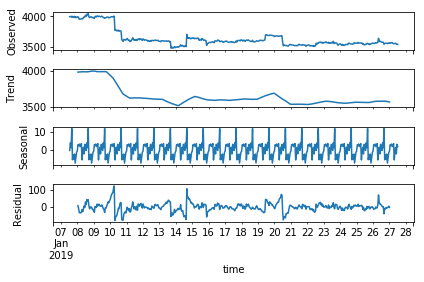

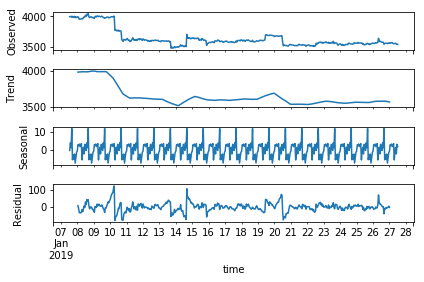

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

sdr = seasonal_decompose(df4['bitcoin'], model='additive')

sdr.plot()

# Normalizing Bitcoin Price

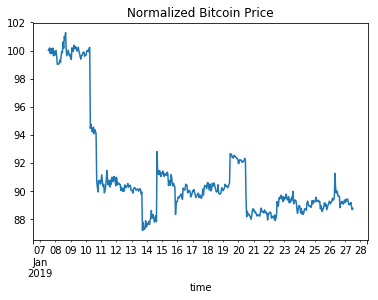

In [8]:
first_price = df5['bitcoin'].iloc[0]
normalized_bitcoin = df5['bitcoin'].div(first_price).mul(100)
normalized_bitcoin.plot(title='Normalized Bitcoin Price')

# Normalized prices of Bitcoin, Ethereum and Dash

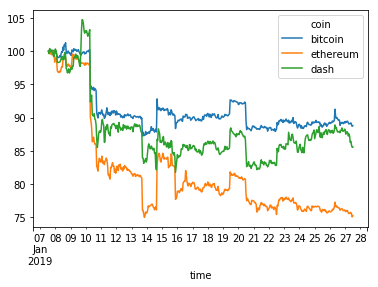

In [9]:
df7 = df4[['bitcoin','ethereum','dash']]
df7_first = df7.iloc[0]
df7_normalized = df7.div(df7_first).mul(100)
df7_normalized.plot()

# Bitcoin predictions

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

m = ExponentialSmoothing(df5, damped=True, trend='additive')

result = m.fit()

result

m.params

xpred = df4.index
ypred = m.predict(m.params, start=1, end=len(df5.index))
xpred = pd.date_range(str(xpred[0]), freq='2h', periods=len(df5.index))
#xpred = df3.index
#xpred
xpred

str(xpred[0])

ypred

pred = pd.Series(ypred, index=xpred)
pred.head(20)


total = pd.DataFrame({'ytrue': df4['bitcoin'], 'ypred': pred})
total.loc['2019-01-26 19:00:00'], total.loc['2019-01-27 19:00:00']

(ypred    3587.270350
 ytrue    3567.555239
 Name: 2019-01-26 19:00:00, dtype: float64, ypred    3599.623907
 ytrue            NaN
 Name: 2019-01-27 19:00:00, dtype: float64)

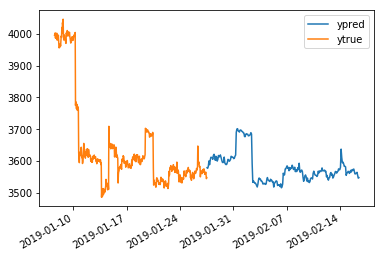

In [11]:
total.plot()